<a href="https://colab.research.google.com/github/LinkedInLearning/deep-learning-and-generative-ai-with-python-data-preprocessing-and-analytics-3896069/blob/main/06_03_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
#Load the dataset

cleaned_df = pd.read_csv('/content/eda_telecom.csv')

In [8]:
cleaned_df.head()

,customer_id,city,zip_code,latitude,longitude,offer,phone_service,multiple_lines,internet_service,internet_type,...,total_charges,gender,age,married,kidhome,teenhome,income,churn,CLV,total_services_used
0,0,346,93225,34.827662,-118.999073,0,1,0,1,0,...,593.30,0,37,1,0,0,30507.0,0,8773.29,5
1,1,368,91206,34.162515,-118.203869,0,1,1,1,0,...,542.40,1,46,0,0,1,59892.0,0,5492.52,3
2,2,222,92627,33.645672,-117.922613,5,1,0,1,2,...,280.85,1,50,0,0,1,70545.0,1,1661.80,3
3,3,587,94553,38.014457,-122.115432,4,1,0,1,2,...,1237.85,1,78,1,0,0,57100.0,0,20793.63,6
4,4,139,93010,34.227846,-119.079903,0,1,0,1,2,...,267.40,0,75,1,1,1,49096.0,1,868.62,4


In [9]:
# Note that CLV and Total Services Used were feature engineered in the previous lab.

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7038 entries, 0 to 7037
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7038 non-null   int64  
 1   city                    7038 non-null   int64  
 2   zip_code                7038 non-null   int64  
 3   latitude                7038 non-null   float64
 4   longitude               7038 non-null   float64
 5   offer                   7038 non-null   int64  
 6   phone_service           7038 non-null   int64  
 7   multiple_lines          7038 non-null   int64  
 8   internet_service        7038 non-null   int64  
 9   internet_type           7038 non-null   int64  
 10  gigabits_used           7038 non-null   float64
 11  online_security         7038 non-null   int64  
 12  online_backup           7038 non-null   int64  
 13  device_protection_plan  7038 non-null   int64  
 14  premium_tech_support    7038 non-null   

<Axes: >

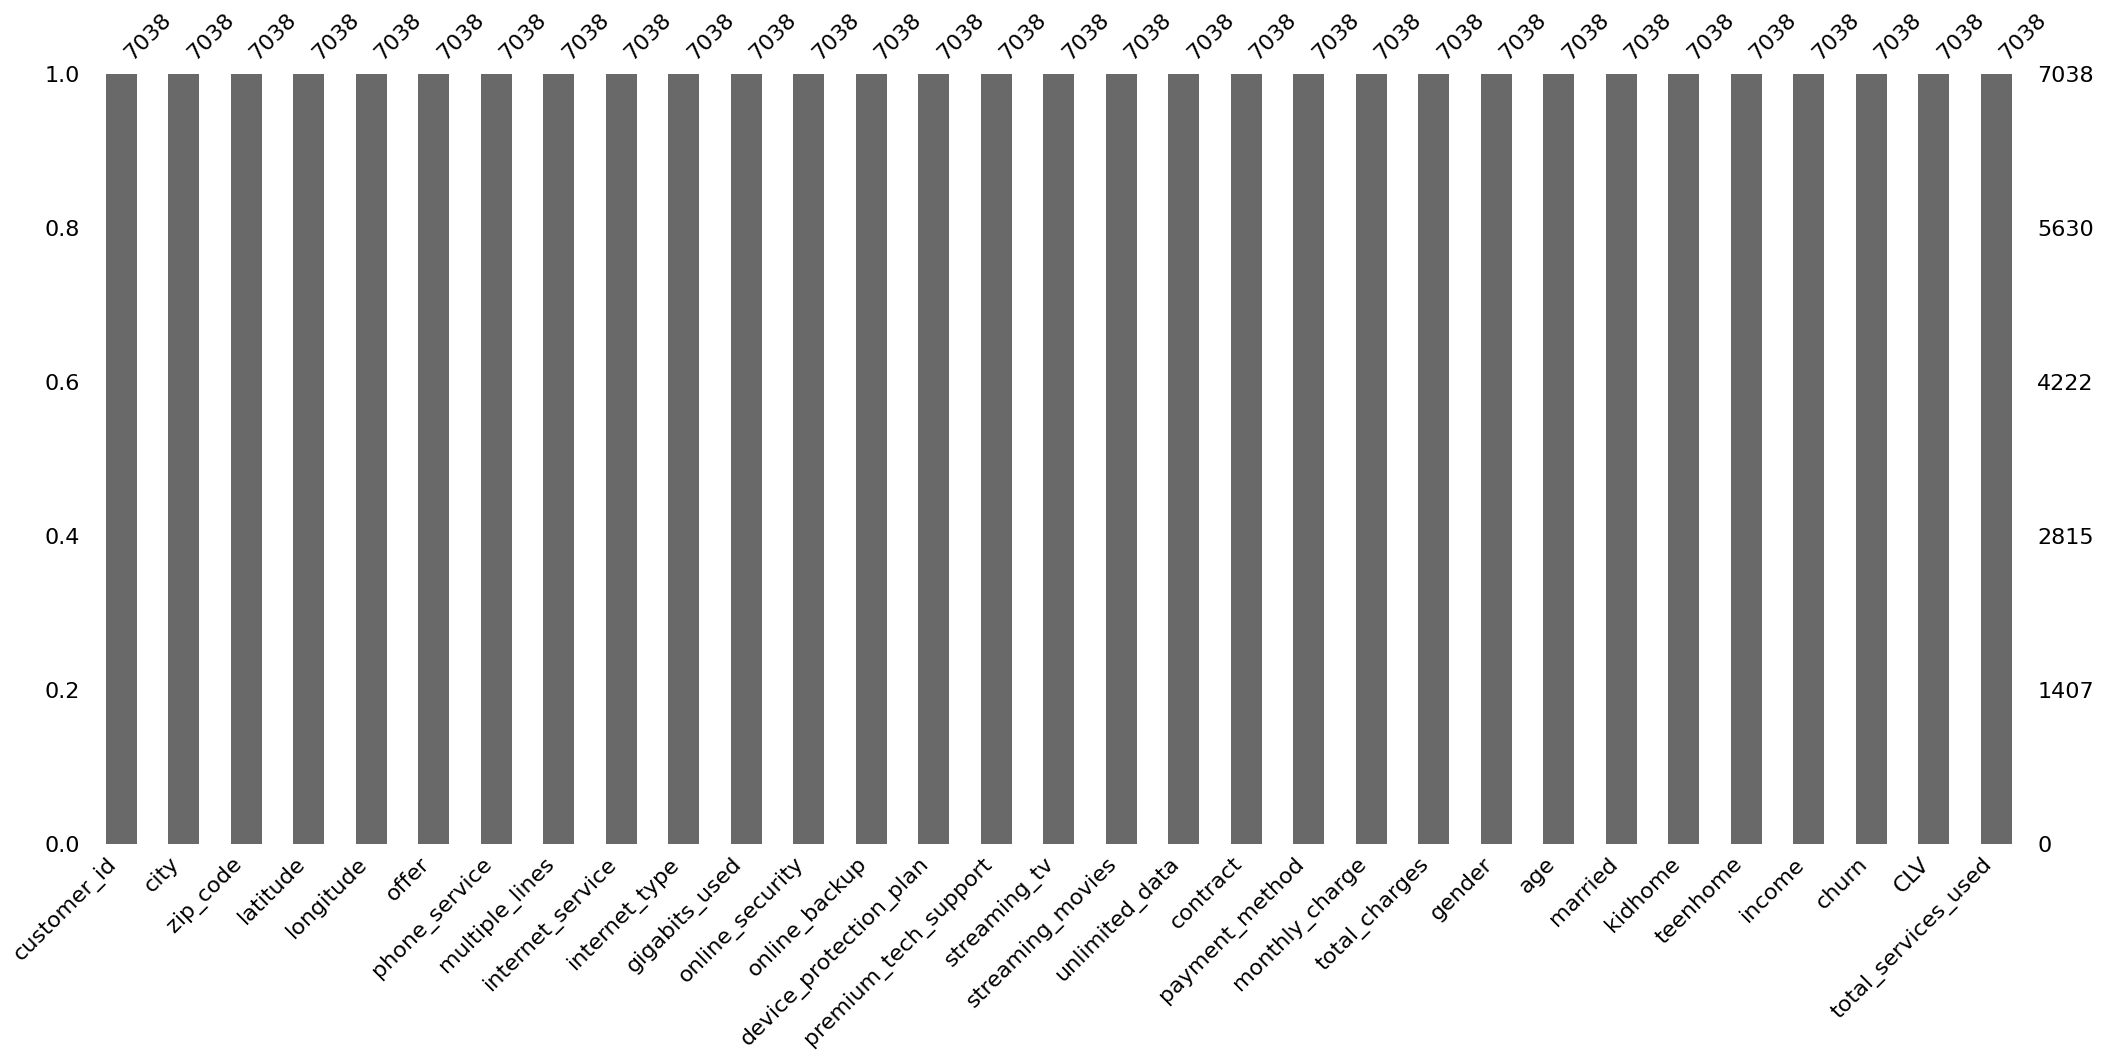

In [10]:
#Check for missing valuese

import missingno as msno

msno.bar(cleaned_df)

In [11]:
# Simple Keras model


# Assuming df is your DataFrame containing the relevant data
# Example feature columns: ['tenure', 'monthly_charge', 'total_charges', 'internet_service', etc.]
# Target column: 'clv'

X = cleaned_df[['monthly_charge', 'total_charges', 'total_services_used']]  # Replacing 'internet service' with total_charges_used
y = cleaned_df['CLV']  # target column (remember tenure*total revenue is CLV)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

# Predict CLV
y_pred = model.predict(X_test)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 66513526784.0000 - val_loss: 64671756288.0000
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65583931392.0000 - val_loss: 64551018496.0000
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 65527783424.0000 - val_loss: 64189644800.0000
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 66032791552.0000 - val_loss: 63453585408.0000
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67539689472.0000 - val_loss: 62237597696.0000
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 63336054784.0000 - val_loss: 60490989568.0000
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60298579968.0000 - val_loss: 58168545280.0000
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60847747072.0000 - val_loss: 55272488960.0000
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56830738432.0000 - val_loss: 51845894144.0000
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━